In [2]:
import torch
import math
import matplotlib.pyplot as plt

In [3]:
def wing_loss(x: torch.Tensor, w: float, e: float):    # x - error
    
    c = w - w * math.log(1 + w / e) # constant
    selector = torch.abs(x) < w # condition
    condition_true = w * torch.log(1 + torch.abs(x) / e)
    condition_false = torch.abs(x) - c
    result = torch.where(selector, condition_true, condition_false)   
    
    return result

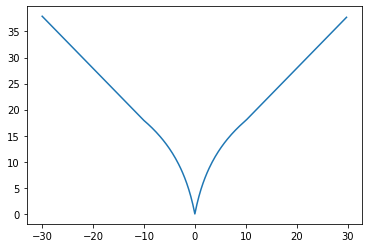

In [4]:
x = torch.arange(-30, 30, 0.2)
w = 10
e = 2
plt.plot(x, wing_loss(x, w, e))

In [10]:
def wing_loss(x_pred: torch.Tensor, x_true: torch.Tensor, w: float, e: float, reduction='mean'):
    
    x = x_pred - x_true # error 
    c = w - w * math.log(1 + w / e) # constant
    selector = torch.abs(x) < w # condition
    condition_true = w * torch.log(1 + torch.abs(x) / e)
    condition_false = torch.abs(x) - c
    result = torch.where(selector, condition_true, condition_false)   
    
    return torch.mean(result)

In [11]:
x_pred = torch.rand(size=(3, 100))
x_true = torch.rand(size=(3, 100))
w = 10
e = 2
print(x_pred.shape)
print(x_true.shape)
print(wing_loss(x_pred, x_true, w, e).shape)

torch.Size([3, 100])
torch.Size([3, 100])
torch.Size([])


In [12]:
wing_loss(x_pred, x_true, w, e)

tensor(1.5551)